1-1. Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

from matplotlib.font_manager import FontProperties
from industries import get_industries_id, get_industries_name

In [25]:
emp_data_path = "data/cleand/3 産業別、売上高経常利益率別常時従業者数"
r_and_d_data_path = "data/cleand/第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費"
patent_data_path = "data/cleand/第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数"
panel_data_path = "data/paneldata/panel_data.csv"

1-2. Change working directory

In [3]:
# Move to /graspp-25S-innovation
# from e.g. 'c:/Users/Username/Git/graspp-25S-innovation/notebooks/assignment_group/HW2'
os.chdir('../../..')
os.getcwd()
# If you accidentally run this more than twice, the working directory might be incorrect, please click 'Restart' in VScode."

'/Users/YMacBOOKBir/Software/git/graspp-25S-innovation'

1-3. Load csv files and create concatenated dataframe

In [4]:
patent_df_org, r_and_d_df_org, emp_df_org = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
patent_total_row_num, r_and_d_total_row_num, emp_total_row_num = 0, 0, 0

for file in os.listdir(patent_data_path):
    if file.endswith(".csv"):
        tmp_df = pd.read_csv(os.path.join(patent_data_path, file), encoding="utf-8")
        tmp_df = tmp_df.drop(columns = tmp_df.columns[0])
        tmp_df[["year"]] = file.split(".")[0]
        tmp_df[["year"]] = tmp_df[["year"]].astype(int)

        # Standardize and column names for merging
        tmp_df = tmp_df.rename(columns={
            "産業": "industry",
            "特許権_企業数": "patent_company_count",
            "特許権_企業数_社": "patent_company_count",
            "_特許権_企業数": "patent_company_count",
            "特許権_件数_所有数": "patent_count",
            "特許権_件数_所有数_件": "patent_count",
            "_特許権_件数_所有数": "patent_count",
            "実用新案権_企業数": "utility_company_count",
            "実用新案権_企業数_社": "utility_company_count",
            "実用新案権_件数_所有数": "utility_count",
            "実用新案権_件数_所有数_件": "utility_count",
            "意匠権_企業数": "design_company_count",
            "意匠権_企業数_社": "design_company_count",
            "意匠権_件数_所有数": "design_count",
            "意匠権_件数_所有数_件": "design_count"
        })

        patent_total_row_num += len(tmp_df)
        patent_df_org = pd.concat([patent_df_org, tmp_df])

for file in os.listdir(r_and_d_data_path):
    if file.endswith(".csv"):
        tmp_df = pd.read_csv(os.path.join(r_and_d_data_path, file), encoding="utf-8")
        tmp_df = tmp_df.drop(columns = tmp_df.columns[0])
        tmp_df[["year"]] = file.split(".")[0]
        tmp_df[["year"]] = tmp_df[["year"]].astype(int)

        # Standardize and column names for merging
        tmp_df = tmp_df.rename(columns={
            "産業": "industry",
            "研究開発_研究開発費_計": "r_and_d_total",
            "研究開発_研究開発費_計_百万円": "r_and_d_total",
            "研究開発_売上高（百万円）": "r_and_d_sales",
            "研究開発_売上高_百万円": "r_and_d_sales",
            "企業数": "company_count",
            "研究開発_企業数": "company_count"
        })

        r_and_d_total_row_num += len(tmp_df)
        r_and_d_df_org = pd.concat([r_and_d_df_org, tmp_df])


for file in os.listdir(emp_data_path):
    if file.endswith(".csv"):
        tmp_df = pd.read_csv(os.path.join(emp_data_path, file), encoding="utf-8")
        tmp_df = tmp_df.drop(columns = tmp_df.columns[0])
        tmp_df[["year"]] = file.split(".")[0]
        tmp_df[["year"]] = tmp_df[["year"]].astype(int)

        emp_total_row_num += len(tmp_df)
        emp_df_org = pd.concat([emp_df_org, tmp_df])

# Check for missing data
print(
    all([
        len(patent_df_org)  == patent_total_row_num,
        len(r_and_d_df_org) == r_and_d_total_row_num,
        len(emp_df_org) == emp_total_row_num
    ])
)

True


1-4. Descriptive statistics

In [5]:
print("The time period is from " + str(min(patent_df_org["year"])) + " to " + str(max(patent_df_org["year"])))
patent_df_org.describe().map(int)

The time period is from 2010 to 2023


,patent_company_count,patent_count,特許権_件数_所有数_使用のもの（含供与）_件,特許権_件数_所有数_使用のもの（含供与）_うち、自社開発_件,utility_company_count,utility_count,実用新案権_件数_所有数_使用のもの（含供与）_件,実用新案権_件数_所有数_使用のもの（含供与）_うち、自社開発_件,design_company_count,design_count,...,year,特許権_件数_使用のもの（含供与）_件,特許権_件数_使用のもの（含供与）_うち、自社開発,実用新案権_使用のもの（含供与）_件,実用新案権_うち、自社開発,意匠権_使用のもの（含供与）_件,意匠権_うち、自社開発,特許権_件数_使用のもの（含供与）_うち自社開発,実用新案権_うち自社開発,意匠権_うち自社開発
count,2161,1999,578,574,2058,1658,475,476,2105,1864,...,2184,1420,1142,1199,961,1340,1076,276,237,262
mean,213,51788,20224,18650,74,761,374,334,115,7412,...,2016,17828,16559,406,348,3154,2970,14000,363,2928
std,905,216845,84732,77536,311,2900,1436,1288,485,30654,...,4,74537,68840,1558,1341,12990,12258,57608,1379,12029
min,1,3,1,1,1,3,1,1,1,3,...,2010,1,1,1,1,1,1,5,1,1
25%,15,385,219,209,5,31,16,14,8,128,...,2013,194,183,20,17,84,77,176,18,74
50%,38,4731,2050,1844,14,100,63,58,24,697,...,2017,1643,1535,58,53,370,355,1201,57,293
75%,112,19112,7120,6637,38,370,182,169,59,2688,...,2020,6702,6546,198,161,1327,1248,5307,199,1181
max,8450,1816213,653710,591211,2615,22490,10834,10000,4245,244062,...,2023,591318,528397,11609,10046,95776,89781,414236,9420,86405


In [6]:
print("The time period is from " + str(min(r_and_d_df_org["year"])) + " to " + str(max(r_and_d_df_org["year"])))
r_and_d_df_org.describe().map(int)

The time period is from 2010 to 2023


,year,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,_企業数,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）
count,2238,691,230,152,93
mean,2016,15305,8713,256,4335
std,4,73950,19769,1084,9742
min,2010,1,1,1,1
25%,2013,56,42,15,14
50%,2016,286,387,51,128
75%,2020,2006,5508,126,2300
max,2023,689393,105801,8529,53389


In [7]:
print("The time period is from " + str(min(emp_df_org["year"])) + " to " + str(max(emp_df_org["year"])))
emp_df_org.describe().map(int)

The time period is from 2003 to 2021


,企業数,year,2%＜ 経常利益率 ≦4%
count,3398,3750,159
mean,2416,2010,276899
std,6383,5,599618
min,1,2003,119
25%,102,2005,10588
50%,363,2011,43396
75%,864,2016,137007
max,30647,2021,2640386


<div style="text-align: left;">
    <div style="font-size: 300%">
        2. Analysis
    </div>
</div>

2-1. Common process

2-1-1. Merge dataframe

In [17]:
patent_df, r_and_d_df, merged_patent_r_and_d_df = patent_df_org.copy(deep=True), r_and_d_df_org.copy(deep=True), pd.DataFrame()

# Narrow down to target columns
target_r_and_d_columns = [
    "year",
    "industry",
    "r_and_d_total",
    # "r_and_d_sales",
    # "company_count"
]
r_and_d_df = r_and_d_df[target_r_and_d_columns]
r_and_d_df[["industry_id"]] = r_and_d_df[["industry"]].map(get_industries_id)
r_and_d_df[["industry_name"]] = r_and_d_df[["industry_id"]].map(get_industries_name)

# Remove NaN rows
r_and_d_df = r_and_d_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)
r_and_d_df.dropna(subset=['r_and_d_total'], inplace=True)

# Narrow down to target columns
target_patent_columns = [
    "year",
    "industry",
    # "patent_company_count",
    "patent_count",
    # "utility_company_count",
    # "utility_count",
    # "design_company_count",
    # "design_count"
]
patent_df = patent_df[target_patent_columns]
patent_df[["industry_id"]] = patent_df[["industry"]].map(get_industries_id)
patent_df[["industry_name"]] = patent_df[["industry_id"]].map(get_industries_name)

# Remove rows with NaN
patent_df = patent_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)
patent_df.dropna(subset=['patent_count'], inplace=True)

# Merge on industry and add columns
if len(merged_patent_r_and_d_df) == 0:
    merged_patent_r_and_d_df = pd.merge(r_and_d_df, patent_df, on=["industry", "industry_id", "industry_name", "year"], how="inner")
else:
    merged_patent_r_and_d_df = pd.concat(
        [merged_patent_r_and_d_df,
            pd.merge(r_and_d_df, patent_df, on=["industry", "industry_id", "industry_name", "year"], how="inner")
        ]
    )

# Convert data type
merged_patent_r_and_d_df["industry"] = merged_patent_r_and_d_df["industry"].astype(str)
merged_patent_r_and_d_df["industry_id"] = merged_patent_r_and_d_df["industry_id"].astype(str)
merged_patent_r_and_d_df["patent_count"] = merged_patent_r_and_d_df["patent_count"].astype(int)
merged_patent_r_and_d_df["r_and_d_total"] = merged_patent_r_and_d_df["r_and_d_total"].astype(int)

2-1-2. Japanese font setting

In [14]:
# Please specify the Japanese font installed on your computer.
#fname = r'c:\Windows\Fonts\meiryo.ttc' if sys.platform == 'win32' else '/Library/Fonts/Arial Unicode.ttf'
#fp = FontProperties(fname = r'c:\Windows\Fonts\meiryo.ttc', size=11)
#plt.rc('font', family=fp.get_name())

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 自分のパソコンにインストールされている日本語フォントを指定してください
# For MacOS
fp = FontProperties(fname = '/Library/Fonts/Arial Unicode.ttf',size = 11)
plt.rc('font', family=fp.get_name())


<div style="font-size: 150%">
    2-2. Show Scatter plots: R&D費用 vs 特許件数
</div>

2-2-1. Hypothesis: Scatter plots(R&D費用 vs 特許件数)<br>
According to 骨太の方針 and previous studies … (TODO)

2-2-2. Scatter plot: R&D費用 vs 特許件数

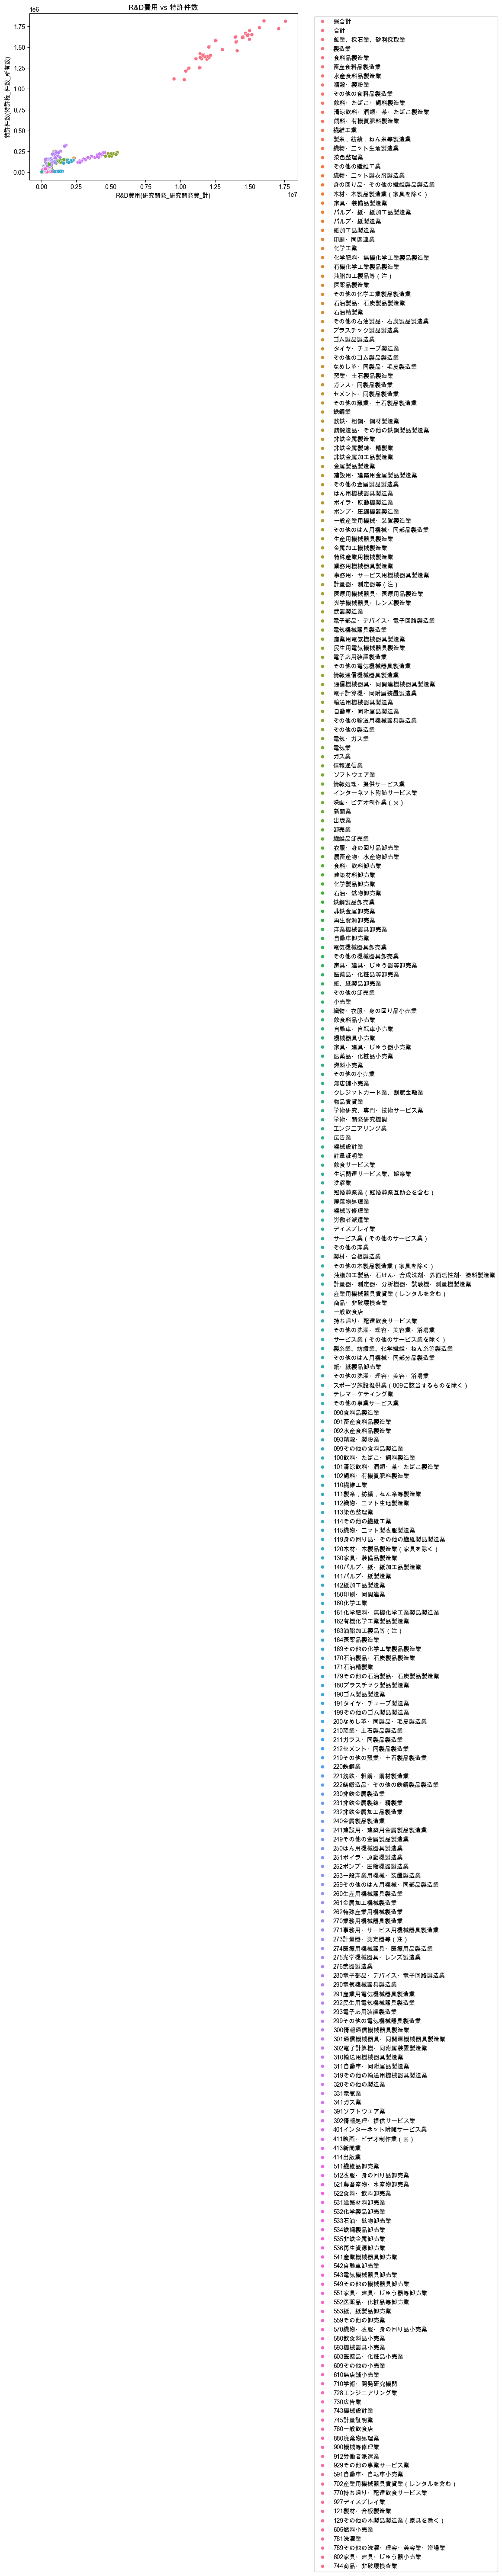

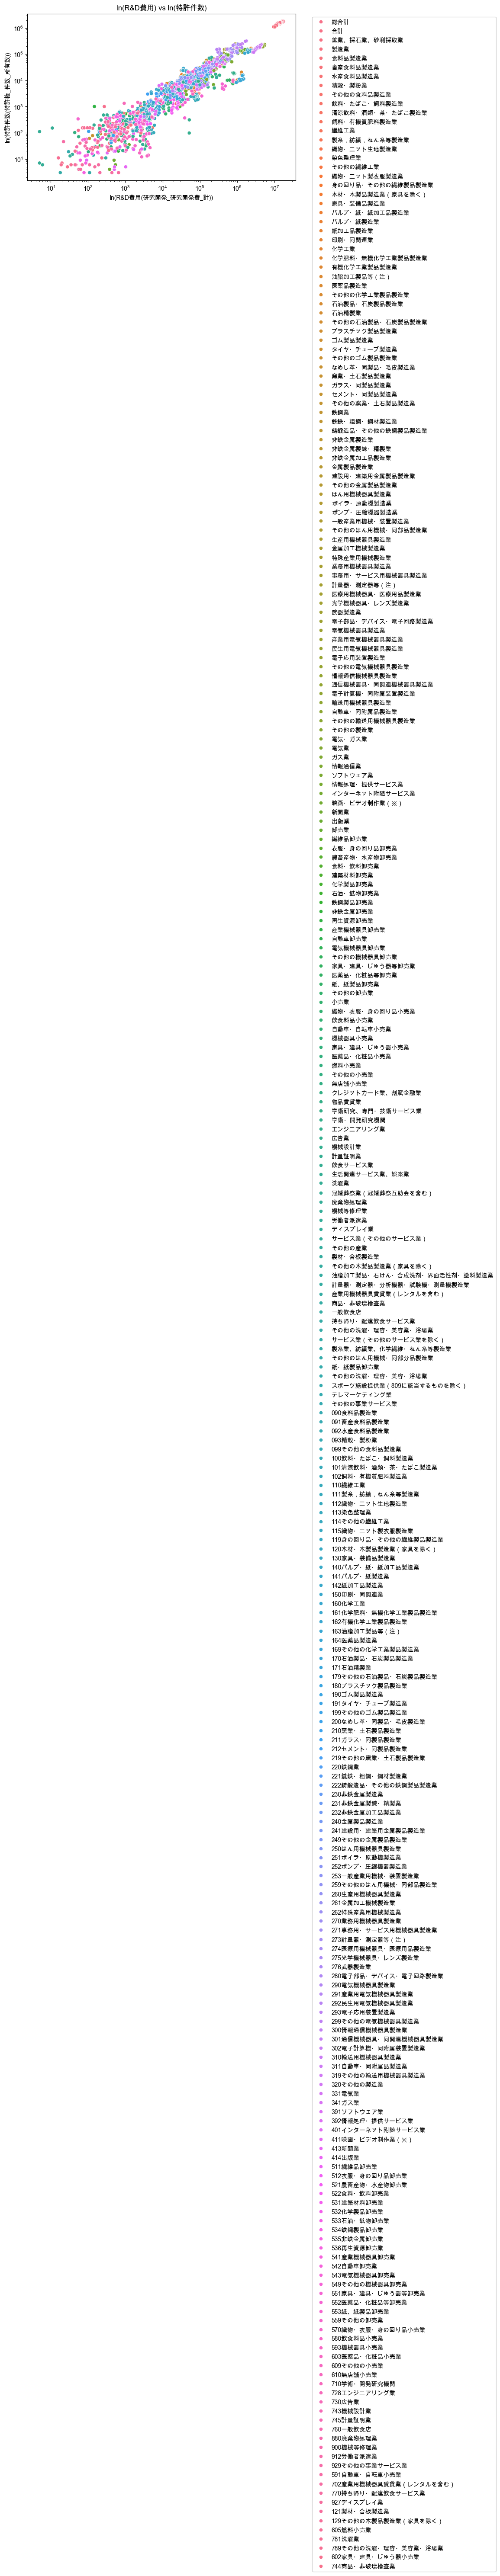

In [ ]:
# Scatter plot: R&D費用 vs 特許件数
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_patent_r_and_d_df, x="r_and_d_total", y="patent_count", hue="industry")
plt.xlabel("R&D費用(研究開発_研究開発費_計)")
plt.ylabel("特許件数(特許権_件数_所有数)")
plt.title("R&D費用 vs 特許件数")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot: ln(R&D費用) vs ln(特許件数)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_patent_r_and_d_df, x="r_and_d_total", y="patent_count", hue="industry")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("ln(R&D費用(研究開発_研究開発費_計))")
plt.ylabel("ln(特許件数(特許権_件数_所有数))")
plt.title("ln(R&D費用) vs ln(特許件数)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2-2-3. Discussion: R&D費用 vs 特許件数<br>
When comparing the hypothesis and the results … (TODO)

<div style="font-size: 150%">
    2-3. Time series: 年ごとの特許件数合計
</div>

2-3-1. Hypothesis: Time series(年ごとの特許件数合計)<br>
According to 骨太の方針 and previous studies … (TODO)

2-3-2. Time series: 年ごとの特許件数合計

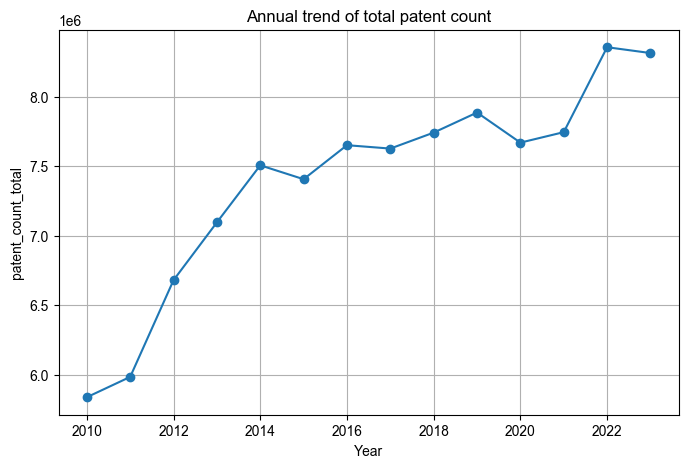

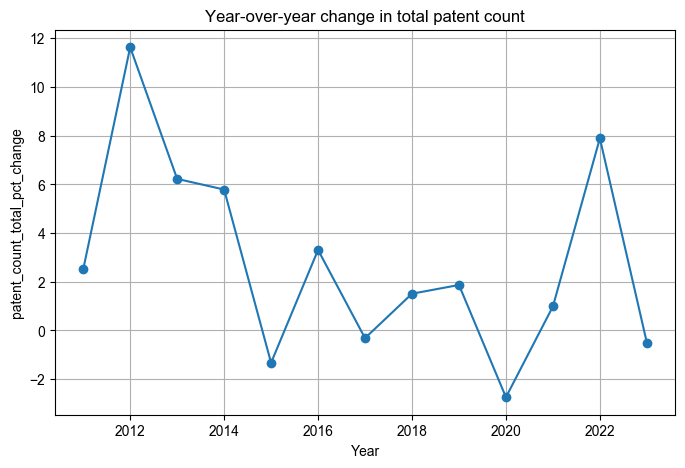

In [29]:
# Time series: 年ごとの特許件数合計
df_panel = pd.read_csv(panel_data_path)

plt.figure(figsize=(8, 5))
yearly_patent = df_panel.groupby("year")["patent_count"].sum()
yearly_patent.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("patent_count_total")
plt.title("Annual trend of total patent count")
plt.grid(True)
plt.show()

# Time series: pct_change
plt.figure(figsize=(8, 5))
yearly_patent_change = yearly_patent.pct_change(1).multiply(100)
yearly_patent_change.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("patent_count_total_pct_change")
plt.title("Year-over-year change in total patent count")
plt.grid(True)
plt.show()

2-3-3. Discussion: Time series(年ごとの特許件数合計)
When comparing the hypothesis and the results … (TODO)

<div style="font-size: 150%">
    2-4. Histgram: 産業別のR&D費用, 企業数, 売上
</div>

2-4-1. Hypothesis: Histgram(産業別のR&D費用, 企業数, 売上)<br>
According to 骨太の方針 and previous studies … (TODO)

2-4-2. Histgram(産業別のR&D費用, 企業数, 売上)

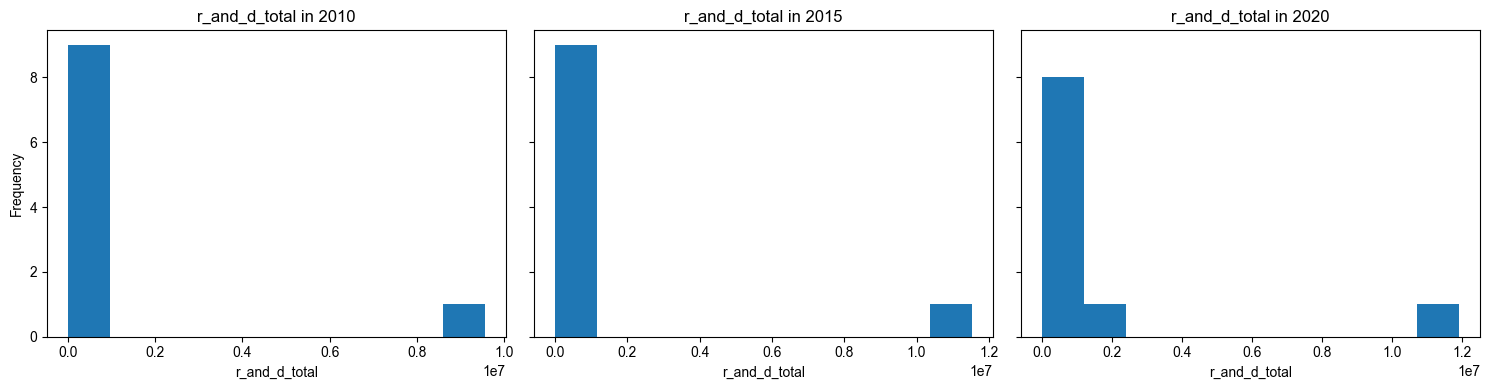

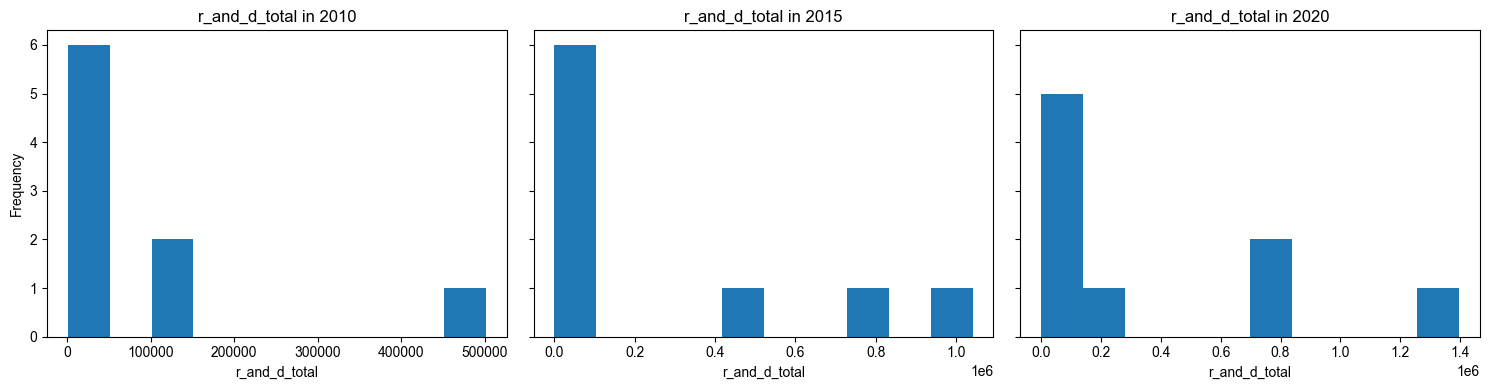

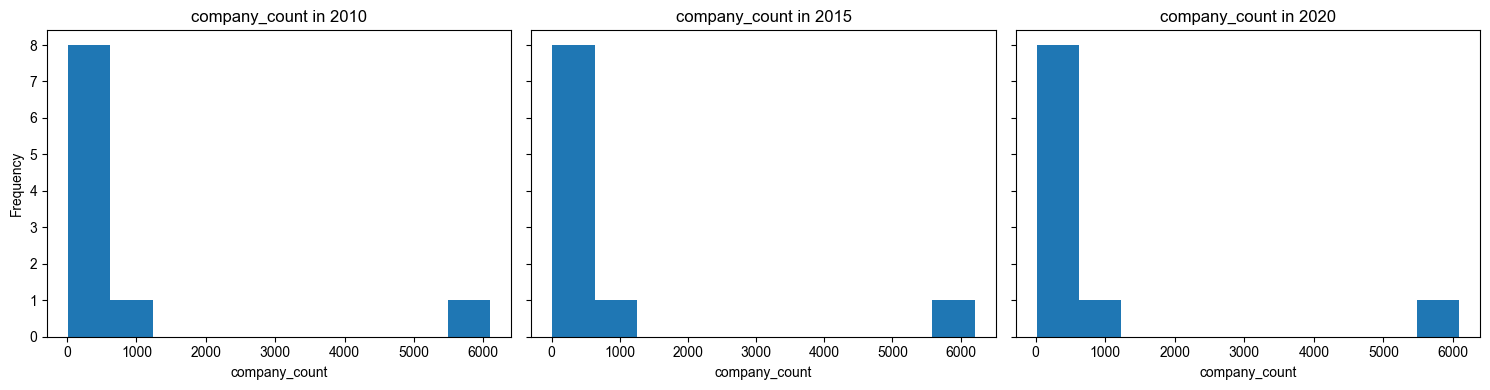

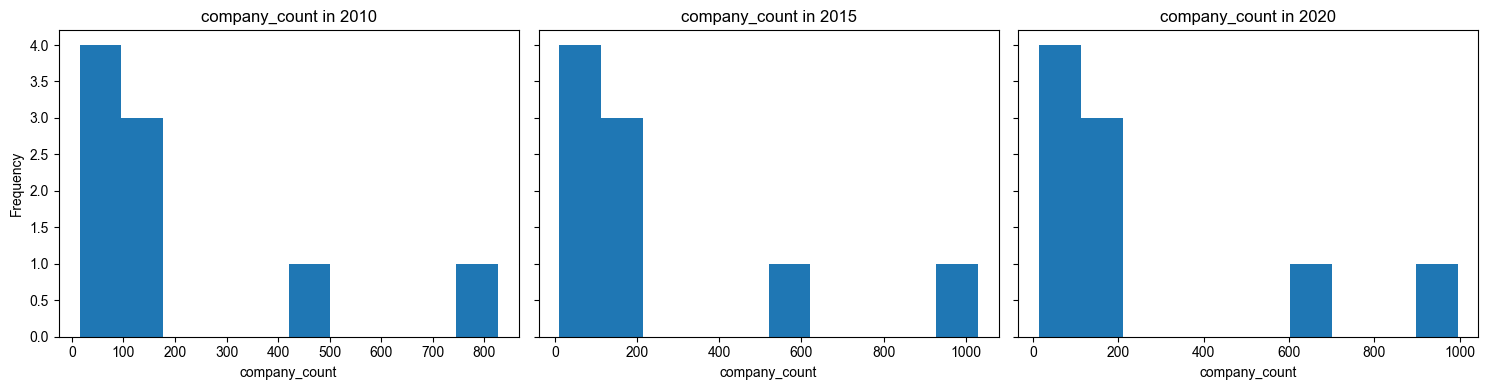

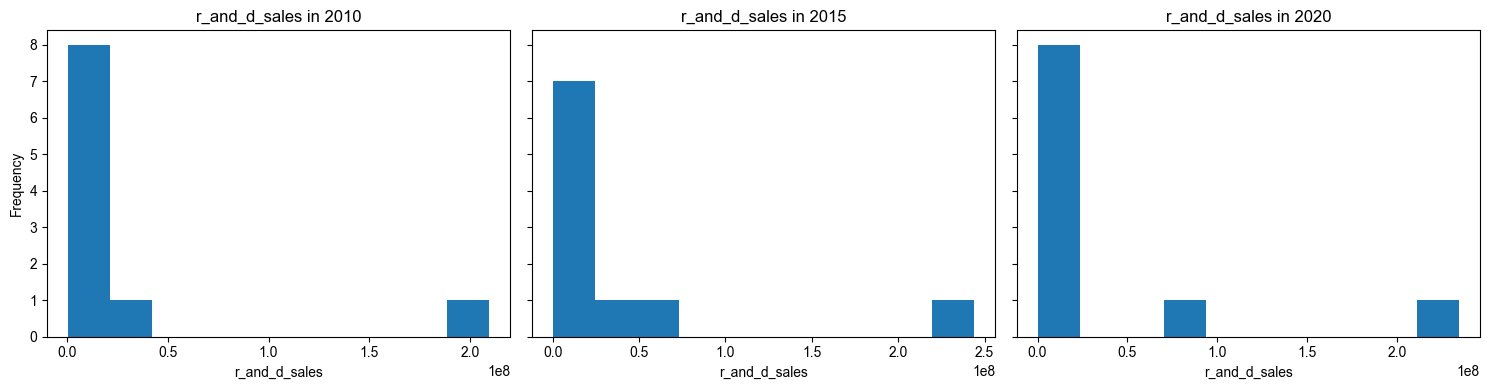

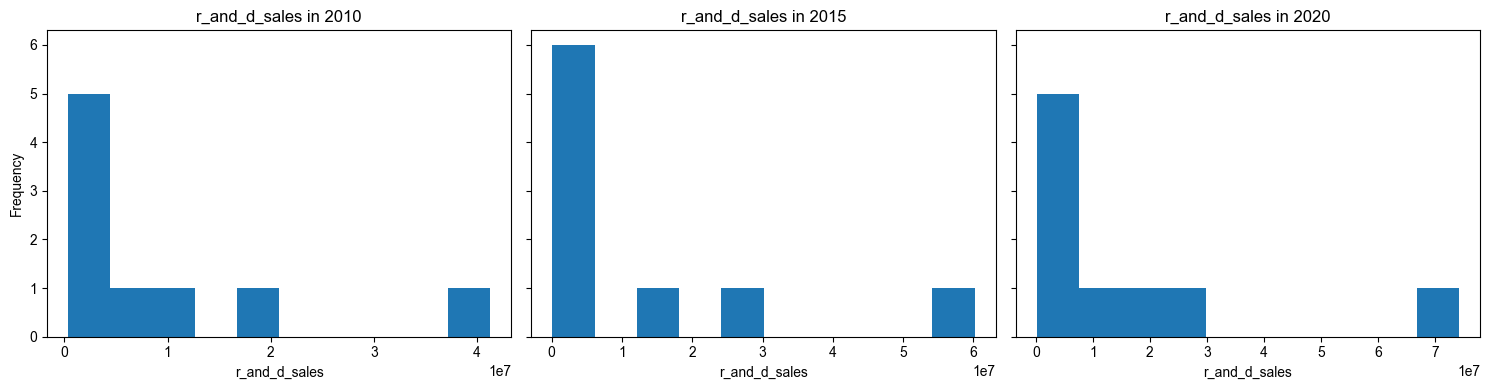

In [30]:
def make_histogram(df:pd.DataFrame, target_column:str, years:list, industries:list = [], exclude_industries:bool = False):
    df = df[df["year"].isin(years)]

    if industries is not None and exclude_industries is False:
        df = df[df['industry'].isin(industries)]
    elif industries is not None and exclude_industries is True:
        df = df[~df['industry'].isin(industries)]
    else:
        pass

    fig, axes = plt.subplots(1, len(years), figsize=(15, 4), sharey=True)
    for i, year in enumerate(years):
        if i == 0:
            axes[i].set_ylabel('Frequency')
        axes[i].hist(df[df["year"] == year][target_column].map(float))
        axes[i].set_title(f'{target_column} in {year}')
        axes[i].set_xlabel(target_column)

large_industries_list = [
    #'鉱業、採石業、砂利採取業',
    '製造業',
    '電気・ガス業',
    '情報通信業',
    '卸売業',
    '小売業',
    #'クレジットカード業、割賦金融業',
    #'物品賃貸業',
    '学術研究、専門・技術サービス業',
    '飲食サービス業',
    '生活関連サービス業、娯楽業',
    #'個人教授所',
    'サービス業（その他のサービス業）',
    'その他の産業'
]

large_industries_without_manufacturing_list = [
    #'鉱業、採石業、砂利採取業',
    # '製造業',
    '電気・ガス業',
    '情報通信業',
    '卸売業',
    '小売業',
    #'クレジットカード業、割賦金融業',
    #'物品賃貸業',
    '学術研究、専門・技術サービス業',
    '飲食サービス業',
    '生活関連サービス業、娯楽業',
    #'個人教授所',
    'サービス業（その他のサービス業）',
    'その他の産業'
]

years = [2010,2015,2020]

r_and_d_df = r_and_d_df_org.copy(deep=True)
# Remove NaN rows
r_and_d_df = r_and_d_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)

# make R&D investment histogram of large industries
make_histogram(r_and_d_df, target_column="r_and_d_total", years=years, industries=large_industries_list)
plt.tight_layout()

# make R&D investment histogram of large industries except manufacturing
make_histogram(r_and_d_df, target_column="r_and_d_total", years=years, industries=large_industries_without_manufacturing_list)
plt.tight_layout()

# make company count histogram of large industries
make_histogram(r_and_d_df, target_column="company_count", years=years, industries=large_industries_list)
plt.tight_layout()

# make company count histogram of large industries except manufacturing
make_histogram(r_and_d_df, target_column="company_count", years=years, industries=large_industries_without_manufacturing_list)
plt.tight_layout()

# make company sales histogram of large industries
make_histogram(r_and_d_df, target_column="r_and_d_sales", years=years, industries=large_industries_list)
plt.tight_layout()

# make company sales histogram of large industries except manufacturing
make_histogram(r_and_d_df, target_column="r_and_d_sales", years=years, industries=large_industries_without_manufacturing_list)
plt.tight_layout()